### Summary

This jupyter notebook looks at general representation stats of tracks and artists in the playlist. For example, how many artists appear on only one playlist, or if you appear on a playlist, are you very likely to appear on another playlist? Does this differ between spotify and user curated playlists?

We'll look at type-token ratio, gini index, T-test

In [1]:
import pandas as pd
import numpy as np
import os, re
from datetime import date, timedelta
import matplotlib.pyplot as plt

from analysis_utils import get_num_appearances, get_all_entries, gini

### Type-token ratio

#### Tracks

In [2]:
unique_tracks = pd.read_csv('../spotify_data/unique_entries_sorted/spotify_curated_unique_track.csv')

In [17]:
result = get_num_appearances(unique_tracks[['track_id']], 'track_id', 'spotify_curated')

In [5]:
type_token = len(unique_tracks)/result['total_entries']
print('The type-token ratio for unique tracks in spotify curated is %f' % (type_token * 100))

The type-token ratio for unique tracks in spotify curated is 11.993440


In [6]:
unique_tracks = pd.read_csv('../spotify_data/unique_entries_sorted/user_curated_unique_track.csv')

In [19]:
result = get_num_appearances(unique_tracks[['track_id']], 'track_id', 'user_curated')

In [9]:
type_token = len(unique_tracks)/result['total_entries']
print('The type-token ratio for unique tracks in user curated is %f' % (type_token * 100))

The type-token ratio for unique tracks in user curated is 10.455538


#### Artists

In [10]:
unique_artists = pd.read_csv('../spotify_data/unique_entries_sorted/spotify_curated_unique_artist.csv')

In [11]:
result = get_num_appearances(unique_artists[['artist_id']], 'artist_id', 'spotify_curated')

In [12]:
type_token = len(unique_artists)/result['total_entries']
print('The type-token ratio for unique artists in spotify curated is %f' % (type_token * 100))

The type-token ratio for unique artists in spotify curated is 5.625104


In [13]:
unique_artists = pd.read_csv('../spotify_data/unique_entries_sorted/user_curated_unique_artist.csv')

In [14]:
result = get_num_appearances(unique_artists[['artist_id']], 'artist_id', 'user_curated')

In [16]:
type_token = len(unique_artists)/result['total_entries']
print('The type-token ratio for unique artists in user curated is %f' % (type_token * 100))

The type-token ratio for unique artists in user curated is 4.967727


#### Labels (artist labels)

In [62]:
labels = pd.read_csv('../spotify_data/all_unique_artist_with_labels.csv')[['artist_id', 'record_label']]
unique_labels = pd.read_csv('../spotify_data/unique_entries_sorted/spotify_curated_unique_artist.csv')[['artist_id']]
unique_labels = unique_labels.merge(labels, on=['artist_id'], how='left')

In [63]:
print('Percentage of unique entries with labels: %f' % (100 * len(unique_labels.dropna())/len(unique_labels)))

Percentage of unique entries with labels: 45.712902


In [64]:
unique_labels.dropna(inplace=True)

In [54]:
result = get_num_appearances(unique_labels[['artist_id']], 'artist_id', 'spotify_curated')

In [55]:
type_token = len(unique_labels.drop_duplicates(['record_label']))/result['playlist_appearances'] # number of entries for spotify curated
print('The type-token ratio for unique labels in spotify curated is %f' % (type_token * 100))

The type-token ratio for unique labels in spotify curated is 4.183468


In [67]:
labels = pd.read_csv('../spotify_data/all_unique_artist_with_labels.csv')[['artist_id', 'record_label']]
unique_labels = pd.read_csv('../spotify_data/unique_entries_sorted/user_curated_unique_artist.csv')[['artist_id']]
unique_labels = unique_labels.merge(labels, on=['artist_id'], how='left')

In [68]:
print('Percentage of unique entries with labels: %f' % (100 * len(unique_labels.dropna())/len(unique_labels)))

Percentage of unique entries with labels: 41.482262


In [69]:
unique_labels.dropna(inplace=True)

In [59]:
result = get_num_appearances(unique_labels[['artist_id']], 'artist_id', 'user_curated')

In [72]:
type_token = len(unique_labels.drop_duplicates(['record_label']))/result['playlist_appearances']
print('The type-token ratio for unique labels in user curated is %f' % (type_token * 100))

The type-token ratio for unique labels in user curated is 2.713482


### Gini Coefficient

#### Tracks

In [4]:
unique_tracks = pd.read_csv('../spotify_data/all_unique_track.csv')

In [17]:
df_all = get_all_entries('spotify_curated', ['track_name', 'track_id'])

In [19]:
appearances = []

for index, row in unique_tracks.iterrows():   
    count = len(df_all[df_all['track_id'] == row['track_id']])
    if count != 0:
        appearances.append(count)

In [37]:
appearances_temp = np.asarray(appearances)
print('Gini coefficient for tracks in spotify curated is %f' % 
      gini(appearances_temp))

Gini coefficient for tracks in spotify curated is 0.487897


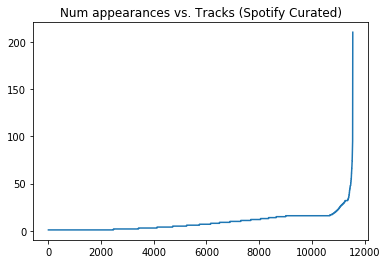

In [38]:
appearances_temp.sort()
plt.title('Num appearances vs. Tracks (Spotify Curated)')
plt.plot(appearances_temp)

In [36]:
df_all = get_all_entries('user_curated', ['track_name', 'track_id'])

In [39]:
appearances = []

for index, row in unique_tracks.iterrows():   
    count = len(df_all[df_all['track_id'] == row['track_id']])
    if count != 0:
        appearances.append(count)

In [40]:
appearances_temp = np.asarray(appearances)
print('Gini coefficient for tracks in user curated is %f' % 
      gini(appearances_temp))

Gini coefficient for tracks in user curated is 0.480025


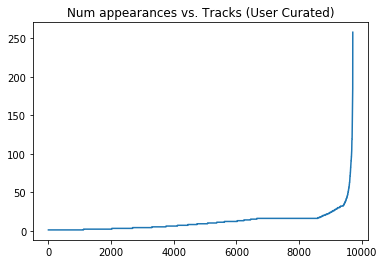

In [41]:
appearances_temp.sort()
plt.title('Num appearances vs. Tracks (User Curated)')
plt.plot(appearances_temp)

#### Artists

In [43]:
unique_artists = pd.read_csv('../spotify_data/all_unique_artist.csv')

In [44]:
df_all = get_all_entries('spotify_curated', ['artist', 'artist_id'])

In [45]:
appearances = []

for index, row in unique_artists.iterrows():   
    count = len(df_all[df_all['artist_id'] == row['artist_id']])
    if count != 0:
        appearances.append(count)

In [46]:
appearances_temp = np.asarray(appearances)
print('Gini coefficient for artists in spotify curated is %f' % 
      gini(appearances_temp))

Gini coefficient for artists in spotify curated is 0.611535


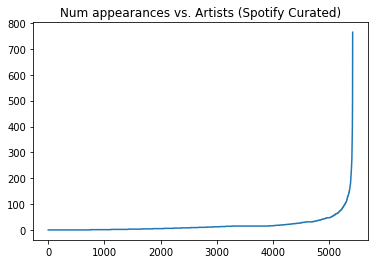

In [47]:
appearances_temp.sort()
plt.title('Num appearances vs. Artists (Spotify Curated)')
plt.plot(appearances_temp)

In [48]:
df_all = get_all_entries('user_curated', ['artist', 'artist_id'])

In [49]:
appearances = []

for index, row in unique_artists.iterrows():   
    count = len(df_all[df_all['artist_id'] == row['artist_id']])
    if count != 0:
        appearances.append(count)

In [50]:
appearances_temp = np.asarray(appearances2)
print('Gini coefficient for artists in user curated is %f' % 
      gini(appearances_temp))

Gini coefficient for artists in user curated is 0.641565


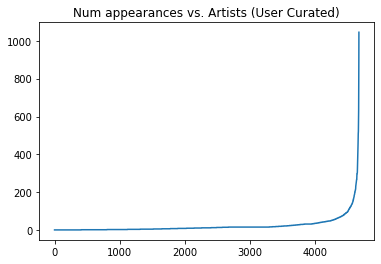

In [51]:
appearances_temp.sort()
plt.title('Num appearances vs. Artists (User Curated)')
plt.plot(appearances_temp)

#### Labels (artist labels)

In [73]:
labels = pd.read_csv('../spotify_data/all_unique_artist_with_labels.csv')[['artist_id', 'record_label']]
unique_labels = pd.read_csv('../spotify_data/unique_entries_sorted/spotify_curated_unique_artist.csv')[['artist_id']]
unique_labels = unique_labels.merge(labels, on=['artist_id'], how='left').dropna()

In [74]:
df_all = get_all_entries('spotify_curated', ['track_id','artist_id'])
df_all = df_all.merge(unique_labels[['artist_id','record_label']], on=['artist_id'], how='inner')

In [76]:
appearances = []

for index, row in unique_labels.iterrows():   
    count = len(df_all[df_all['record_label'] == row['record_label']])
    if count != 0:
        appearances.append(count)

In [77]:
appearances_temp = np.asarray(appearances)
print('Gini coefficient for labels in spotify curated is %f' % 
      gini(appearances_temp))

Gini coefficient for labels in spotify curated is 0.770658


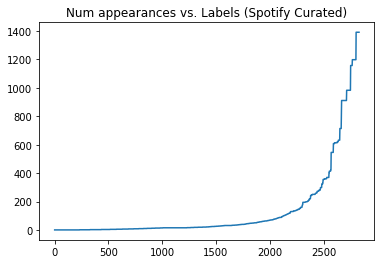

In [78]:
appearances_temp.sort()
plt.title('Num appearances vs. Labels (Spotify Curated)')
plt.plot(appearances_temp)

In [79]:
labels = pd.read_csv('../spotify_data/all_unique_artist_with_labels.csv')[['artist_id', 'record_label']]
unique_labels = pd.read_csv('../spotify_data/unique_entries_sorted/user_curated_unique_artist.csv')[['artist_id']]
unique_labels = unique_labels.merge(labels, on=['artist_id'], how='left').dropna()

In [81]:
df_all = get_all_entries('user_curated', ['track_id','artist_id'])
df_all = df_all.merge(unique_labels[['artist_id','record_label']], on=['artist_id'], how='left')

In [82]:
appearances = []

for index, row in unique_labels.iterrows():   
    count = len(df_all[df_all['record_label'] == row['record_label']])
    if count != 0:
        appearances.append(count)

In [84]:
appearances_temp = np.asarray(appearances)
print('Gini coefficient for labels in user curated is %f' % 
      gini(appearances_temp))

Gini coefficient for labels in user curated is 0.766660


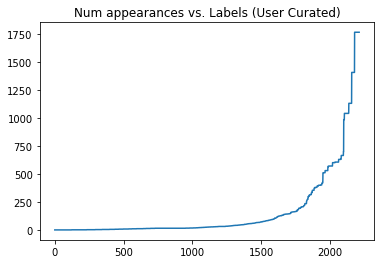

In [85]:
appearances_temp.sort()
plt.title('Num appearances vs. Labels (User Curated)')
plt.plot(appearances_temp)

### Type-token of individual playlists

#### Tracks

In [13]:
type_tokens_spotify = []

rootdir = '../spotify_data/playlist_tracks/spotify_curated/'

for playlist in os.listdir(rootdir):
    dfs_all = []
    
    if not os.path.isdir(rootdir + '/' + playlist): continue
    
    for file in os.listdir(rootdir + '/' + playlist):           
        filepath = rootdir + '/' + playlist + '/' + file
        if os.path.isdir(filepath): continue

        dfs_all.append(pd.read_csv(filepath)[['track_id']])
        
    all_songs = pd.concat(dfs_all)
    type_tokens_spotify.append(len(all_songs.drop_duplicates(['track_id']))/len(all_songs))

In [14]:
type_tokens_user = []

rootdir = '../spotify_data/playlist_tracks/user_curated/'

for playlist in os.listdir(rootdir):
    dfs_all = []
    
    if not os.path.isdir(rootdir + '/' + playlist): continue
    
    for file in os.listdir(rootdir + '/' + playlist):           
        filepath = rootdir + '/' + playlist + '/' + file
        if os.path.isdir(filepath): continue

        dfs_all.append(pd.read_csv(filepath)[['track_id']])
        
    all_songs = pd.concat(dfs_all)
    type_tokens_user.append(len(all_songs.drop_duplicates(['track_id']))/len(all_songs))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa7f27bf358>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa7f27bf9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa7f27b9f28>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa7f27b99e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa7f27adc50>,
 'means': []}

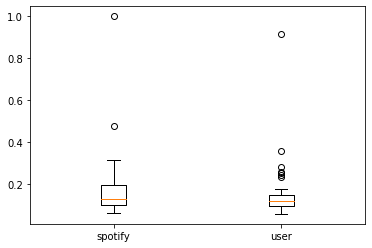

In [16]:
fig, ax = plt.subplots()
ax.set_title('Track type token per playlist')
ax.set_xticklabels(['spotify', 'user'])
ax.boxplot([type_tokens_spotify, type_tokens_user])

#### Artists

In [25]:
type_tokens_spotify = []

rootdir = '../spotify_data/playlist_tracks/spotify_curated/'

for playlist in os.listdir(rootdir):
    dfs_all = []
    
    if not os.path.isdir(rootdir + '/' + playlist): continue
    
    for file in os.listdir(rootdir + '/' + playlist):           
        filepath = rootdir + '/' + playlist + '/' + file
        if os.path.isdir(filepath): continue

        dfs_all.append(pd.read_csv(filepath)[['artist_id']])
        
    all_songs = pd.concat(dfs_all)
    type_tokens_spotify.append(len(all_songs.drop_duplicates(['artist_id']))/len(all_songs))

In [26]:
type_tokens_user = []

rootdir = '../spotify_data/playlist_tracks/user_curated/'

for playlist in os.listdir(rootdir):
    dfs_all = []
    
    if not os.path.isdir(rootdir + '/' + playlist): continue
    
    for file in os.listdir(rootdir + '/' + playlist):           
        filepath = rootdir + '/' + playlist + '/' + file
        if os.path.isdir(filepath): continue

        dfs_all.append(pd.read_csv(filepath)[['artist_id']])
        
    all_songs = pd.concat(dfs_all)
    type_tokens_user.append(len(all_songs.drop_duplicates(['artist_id']))/len(all_songs))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa7f2b25198>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa7f01da5f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa7f01fb748>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa7f01f21d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa7f01f2da0>,
 'means': []}

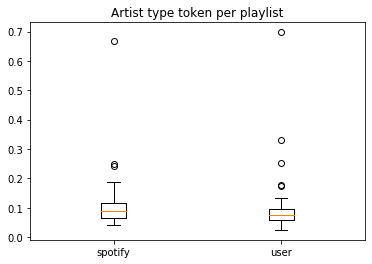

In [27]:
fig, ax = plt.subplots()
ax.set_title('Artist type token per playlist')
ax.set_xticklabels(['spotify', 'user'])
ax.boxplot([type_tokens_spotify, type_tokens_user])

#### Labels (artist labels)

In [29]:
labels = pd.read_csv('../spotify_data/all_unique_artist_with_labels.csv')[['artist_id', 'record_label']]

In [38]:
type_tokens_spotify = []

rootdir = '../spotify_data/playlist_tracks/spotify_curated/'

for playlist in os.listdir(rootdir):
    dfs_all = []
    
    if not os.path.isdir(rootdir + '/' + playlist): continue
    
    for file in os.listdir(rootdir + '/' + playlist):           
        filepath = rootdir + '/' + playlist + '/' + file
        if os.path.isdir(filepath): continue

        dfs_all.append(pd.read_csv(filepath)[['artist_id']])
        
    all_songs = pd.concat(dfs_all)
    all_songs = all_songs.merge(labels, on=['artist_id'], how='left')
    all_songs.dropna(subset=['record_label'], inplace=True)
    
    type_tokens_spotify.append(len(all_songs.drop_duplicates(['record_label']))/len(all_songs))

In [39]:
type_tokens_spotify = []

rootdir = '../spotify_data/playlist_tracks/user_curated/'

for playlist in os.listdir(rootdir):
    dfs_all = []
    
    if not os.path.isdir(rootdir + '/' + playlist): continue
    
    for file in os.listdir(rootdir + '/' + playlist):           
        filepath = rootdir + '/' + playlist + '/' + file
        if os.path.isdir(filepath): continue

        dfs_all.append(pd.read_csv(filepath)[['artist_id']])
        
    all_songs = pd.concat(dfs_all)
    all_songs = all_songs.merge(labels, on=['artist_id'], how='left')
    all_songs.dropna(subset=['record_label'], inplace=True)
    
    type_tokens_spotify.append(len(all_songs.drop_duplicates(['record_label']))/len(all_songs))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa7f2b2a0b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa7f2afcbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa7f2b2ac18>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa7f02acd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa7f2ada908>,
 'means': []}

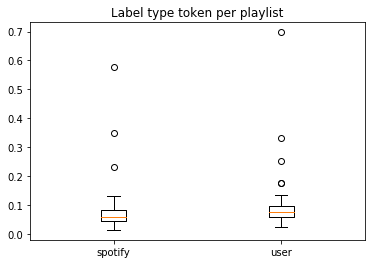

In [40]:
fig, ax = plt.subplots()
ax.set_title('Label type token per playlist')
ax.set_xticklabels(['spotify', 'user'])
ax.boxplot([type_tokens_spotify, type_tokens_user])

### Overall popularity distribution

#### Tracks + Artists

In [ ]:
track_popularity_spotify = []
artist_popularity_spotify = []

rootdir = '../spotify_data/playlist_tracks/spotify_curated/'

for playlist in os.listdir(rootdir):
    dfs_all = []
    
    if not os.path.isdir(rootdir + '/' + playlist): continue
    
    for file in os.listdir(rootdir + '/' + playlist):           
        filepath = rootdir + '/' + playlist + '/' + file
        if os.path.isdir(filepath): continue

        dfs_all.append(pd.read_csv(filepath)[['track_popularity', 'artist_popularity']])
        
    all_songs = pd.concat(dfs_all)
    type_tokens_spotify.append(len(all_songs.drop_duplicates(['track_id']))/len(all_songs))

In [ ]:
track_popularity_user = []
artist_popularity_user = []

rootdir = '../spotify_data/playlist_tracks/user_curated/'

for playlist in os.listdir(rootdir):
    dfs_all = []
    
    if not os.path.isdir(rootdir + '/' + playlist): continue
    
    for file in os.listdir(rootdir + '/' + playlist):           
        filepath = rootdir + '/' + playlist + '/' + file
        if os.path.isdir(filepath): continue

        dfs_all.append(pd.read_csv(filepath)[['track_id']])
        
    all_songs = pd.concat(dfs_all)
    type_tokens_spotify.append(len(all_songs.drop_duplicates(['track_id']))/len(all_songs))

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Track type token per playlist')
ax.set_xticklabels(['spotify', 'user'])
ax.boxplot([type_tokens_spotify, type_tokens_user])